# Gridfonts

This notebook explores the dataset "gridfonts" that is composed of letter a's based on Douglas Hofstadter and colleagues [Letter Spririt](https://cogsci.indiana.edu/letterspirit.html) project. See also [gridfonts](https://cogsci.indiana.edu/gridfonts.html).

This data was used in both Gary McGraw's and Douglas Blank's theses to train neural networks. See section 6.3.2 of [McGraw's thesis](http://goosie.cogsci.indiana.edu/farg/mcgrawg/thesis.html), and Blank's thesis [Learning to See Analogies: a Connectionist Exploration](https://www.academia.edu/2808733/Learning_to_see_analogies_a_connectionist_exploration).

In [15]:
from conx import Network, Layer, FlattenLayer, Dataset, shape, Conv2DLayer

First, we download and load the gridfonts dataset:

In [16]:
ds = Dataset.get("gridfonts")

In [17]:
ds.summary()

Input Summary:
   count  : 229 (229 for training, 0 for testing)
   shape  : [(153,)]
   range  : [(0, 1)]
Target Summary:
   count  : 229 (229 for training, 0 for testing)
   shape  : [(153,), (153,)]
   range  : [(0, 1), (0, 1)]


The gridfonts database is composed of 229 a's where:

* input - a 153 integer "picture" of an "a" representing 17 rows and 9 columns
* targets - two 153 pictures, representing the "brim" of the letter a, and the "body"

Let's display the letters in a graphical manner:

In [26]:
def display_letter(letter, brim, body):
    print("Letter        Brim          Body")
    for row in range(17):
        for col in range(9):
            print("." if letter[row * 9 + col] == 0 else "X", end="")
        print("     ", end="")
        for col in range(9):
            print("." if brim[row * 9 + col] == 0 else "X", end="")
        print("     ", end="")
        for col in range(9):
            print("." if body[row * 9 + col] == 0 else "X", end="")
        print()

In [27]:
display_letter(ds.inputs[0], ds.targets[0][0], ds.targets[0][1])

Letter        Brim          Body
.........     .........     .........
.........     .........     .........
.........     .........     .........
.........     .........     .........
....XXXXX     ....X....     ....XXXXX
...XX...X     ...X.....     ....X...X
..X.X...X     ..X......     ....X...X
.X..X...X     .X.......     ....X...X
X...X...X     X........     ....X...X
...X...X.     .........     ...X...X.
..X...X..     .........     ..X...X..
.X...X...     .........     .X...X...
XXXXX....     .........     XXXXX....
.........     .........     .........
.........     .........     .........
.........     .........     .........
.........     .........     .........


Let's design some networks that attempt to replicate the brim and body given the original gridfont letter.

First, let's change the format of the dataset input so that we can treat the input as a 2D 17 x 9 image rather than merely a vector of 153 values. We actually make it a 3D shape, the third dimension representing color (which it doesn't have).

In [28]:
ds.inputs.reshape(0, (17, 9, 1))

We can now use a Convolutional Layer to better process the letter "picture". Notice that we flatten the output of the Convolutional layer to bring the output back into a single dimension.

In [29]:
net = Network("Gridfonts")
net.add(Layer("input", (17, 9, 1)))
net.add(Conv2DLayer("conv", 2, (2,2)))
net.add(FlattenLayer("flatten"))
net.add(Layer("hidden", 50, activation="relu"))
net.add(Layer("brim", 153, vshape=(17, 9), activation="sigmoid"))
net.add(Layer("body", 153, vshape=(17, 9), activation="sigmoid"))

net.connect("input", "conv")
net.connect("conv", "flatten")
net.connect("flatten", "hidden")
net.connect("hidden", "brim")
net.connect("hidden", "body")
net.compile(error="mse", optimizer="adam")

We associate the dataset to the network, and save 10 pictures for testing.

In [30]:
net.set_dataset(ds)
net.dataset.split(10)

We wish to show the targets in the following visualizations, so we can 

In [32]:
net.config["show_targets"] = True

In [33]:
net.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), FloatSlider(value=1.0, continuous_update=False, description='Zoom', max=3.0, min=0.5), IntText(value=150, description='Horizontal space between banks:', style=DescriptionStyle(description_width='initial')), IntText(value=30, description='Vertical space between layers:', style=DescriptionStyle(description_width='initial')), HBox(children=(Checkbox(value=True, description='Show Targets', style=DescriptionStyle(description_width='initial')), Checkbox(value=False, description='Errors', style=DescriptionStyle(description_width='initial')))), Select(description='Features:', options=('', 'input', 'conv'), rows=1, value=''), IntText(value=3, description='Feature columns:', style=DescriptionStyle(description_width='initial')), FloatText(value=2.0, description='Feature scale:', style=DescriptionStyle(description_width='initial'))), layout=Layout(width='100%')), VBox(children=(Select(description='Layer:', index=5, options=('input', 'conv', 'flatten', 'hidden', 'brim', 'body'), rows=1, value='body'), Checkbox(value=True, description='Visible'), Select(description='Colormap:', options=('', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Vega10', 'Vega10_r', 'Vega20', 'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spectral', 'spectral_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'viridis', 'viridis_r', 'winter', 'winter_r'), rows=1, value=''), HTML(value='<img src="data:image/gif;base64,R0lGODdhLAEZAIcAAPEBAY8AAM8AAAEB8q8AAAAAbwAAsAAAkAAA0PTo8vr3+wAAV0dH/7e3//9WVv/W1hYW/zQ0/2dn/4aG/6Sk/9nZ//8XF/82Nv9oaP+Xl/+1tSQk/1lZ/3h4/5SU/8nJ//8mJv9ERP95ef+Hh/+mpv/ExH8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now, we are ready to train the network to replicate the letter parts.

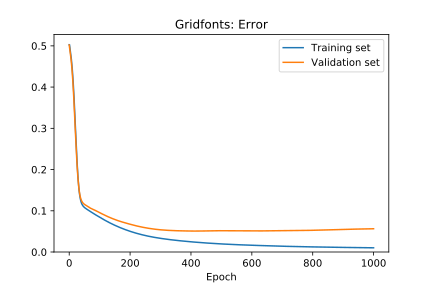

       |  Training |  Validate |      body |      brim |       val |       val 
Epochs |     Error |     Error |       acc |       acc |  body acc |  brim acc 
------ | --------- | --------- | --------- | --------- | --------- | --------- 
# 1000 |   0.01018 |   0.05640 |   0.76256 |   0.70776 |   0.30000 |   0.50000 


In [35]:
net.train(1000, accuracy=1.0, tolerance=0.4, plot=True, 
          batch_size=len(net.dataset.train_inputs), 
          report_rate=100)

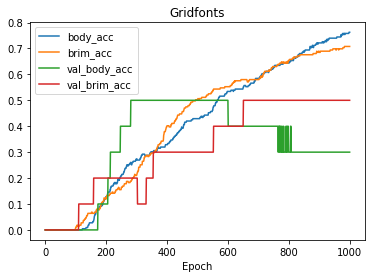

In [36]:
net.plot(".*acc")

<IPython.core.display.Javascript object>

<Network name='Gridfonts' (compiled)>
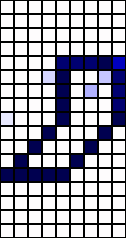
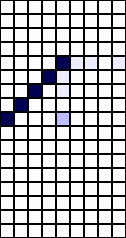
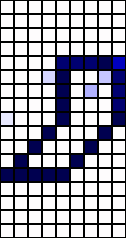
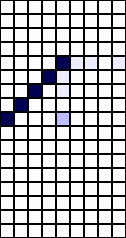
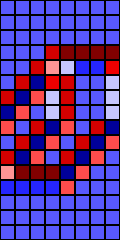
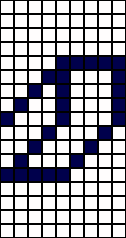

In [37]:
net